In [1]:
import re
import pandas as pd
import numpy as np
from google.colab import files
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import text, sequence

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
#preprocessing the data
df = pd.read_csv("Tweets_cleaned.csv")
df.drop(columns=["Unnamed: 0"]	,axis=1,inplace=True)

In [5]:
def clean(text):
  text = text.lower()
  text = ' '.join([word for word in text.split() if word not in stopwords.words()])
  text= re.sub("'<.*?>'"," ",text)
  return text

In [ ]:
#data["Text"]=data["Text"].map(lambda x: clean(x))

In [6]:
x = df["Text"]
y = pd.get_dummies(df['sentiment']).values

In [7]:
df

,Text,sentiment,Created
0,bitcoin crashes bitcoin crashes bitcoin crashe...,neutral,2021-07-06
1,bitcoin mining uses renewable energy move elon...,postive,2021-07-06
2,breaking allied payment network digital paymen...,neutral,2021-07-06
3,world famous chain pavilions hotels amp resort...,postive,2021-07-06
4,indian finance minister nsitharaman said worki...,postive,2021-07-06
...,...,...,...
3445,rt getmasafinance signup waitlist 🌽 shortcut f...,postive,2021-07-12
3446,rt cryptowoolf bitcoin back people regret buyi...,neutral,2021-07-12
3447,rt acccryptonews 🔳♥️🔳if love bitcoin retweet m...,postive,2021-07-12
3448,rt projectsico hash rate recovering since bitc...,neutral,2021-07-12


In [8]:
#tokenization
max_num_words = 10000
max_len=x.apply(lambda x :len(x)).max()
emb_dim = 100

In [9]:
tokenizer = Tokenizer(num_words=max_num_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)

In [10]:
tokenizer.fit_on_texts(x.values)

In [ ]:
word_index = tokenizer.word_index

In [17]:
print('Found %s unique tokens.' % len(word_index))
#give you number of unique words present in the dataset along with the frequency of occurence.

Found 7112 unique tokens.


In [12]:
x = tokenizer.texts_to_sequences(df["sentiment"].values)
x = sequence.pad_sequences(x, maxlen=max_len)
print('Shape of data tensor:', x.shape)

Shape of data tensor: (3450, 137)


In [13]:
x_train, x_test, y_train, y_test= train_test_split(x,y ,random_state = 42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(2587, 137) (2587, 3)
(863, 137) (863, 3)


In [14]:
x.shape[1]

137

In [ ]:
#vanilla LSTM
from keras.layers.core import Dense, SpatialDropout1D
from keras.callbacks import ModelCheckpoint, EarlyStopping
model = Sequential()
model.add(Embedding(max_num_words, emb_dim, input_length=x.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 12
batch_size = 200

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

In [19]:
accr = model.evaluate(x_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

27/27 [==============================] - 1s 33ms/step - loss: 0.5736 - accuracy: 0.6860
Test set
  Loss: 0.574
  Accuracy: 0.686


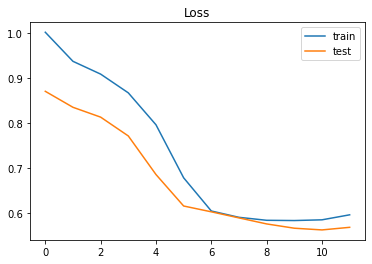

In [20]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

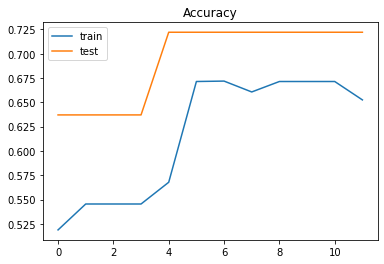

In [21]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [30]:
new = [' Musk tweets a meme of Buffett with a fake quote about cryptocurrencies']
seq = tokenizer.texts_to_sequences(new)

In [31]:
padd = sequence.pad_sequences(seq, maxlen=max_len)

In [32]:
pred = model.predict(padd)

In [33]:
labels = ["Negative","Neutral","Positive"]
print(pred, labels[np.argmax(pred)])

[[0.47179618 0.21823014 0.3099737 ]] Negative


In [35]:
pip install pyyaml h5py

In [38]:
from keras.models import load_model
model.save("LSTM_sentimnet.h5")

In [39]:
files.download("LSTM_sentimnet.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
model=load_model("LSTM_sentimnet.h5")

In [ ]:
def load_model():
    global model
    # model variable refers to the global variable
    with open('iris_trained_model.pkl', 'rb') as f:
        model = pickle.load(f)